# Image Processing
This tutorial will examine how to use Python and Numpy to process images, which can be expressed as 2 or 3 dimensional arrays.

## More Array Functions

First we look at another method of constructing 2d arrays, by constructing one row at a time. Suppose we want to create the following array, where the first row is powers of 2, the second row is powers of 3, and so on:

$$\begin{matrix}
1 & 2 & 4 & 8 \\
1 & 3 & 9 & 27 \\
1 & 4 & 16 & 64
\end{matrix}$$
We create a zero array of the desired dimensions using the function `np.zeros`:

In [1]:
import numpy as np

a = np.zeros((3, 4))
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Notice the double brackets, which are necessary because the function `np.zeros` takes a tuple as a parameter.

Next, we create each of the individual rows as 1 x 4 arrays:

In [2]:
x = np.arange(0, 4)
row1 = 2 ** x
print(row1)
row2 = 3 ** x
print(row2)
row3 = 4 ** x
print(row3)

[1 2 4 8]
[ 1  3  9 27]
[ 1  4 16 64]


Finally, we assign each row to the correct row in `a` using slice notation:

In [3]:
a[0, :] = row1
a[1,:] = row2
a[2,:] = row3

print(a)

[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


### `shape` Method

Given an array, we can determine its dimensions using the `shape` method, which returns a tuple:

In [4]:
s = a.shape
print(s)

x = s[0]
y = s[1]

print("first dimension:", x)
print("second dimension:", y)

(3, 4)
first dimension: 3
second dimension: 4


### Axis Methods
The method `np.sum` allows us to calculate the sum of the elements in an array. If your array is 2-dimensional, it is often useful to calculate the sum in one dimension only, to return a 1-dimensional array. This can be achieved using the `axis` parameter of the `sum` function:

In [5]:
sum_of_rows = np.sum(a, axis=0)
print(sum_of_rows)

[ 3.  9. 29. 99.]


This method has performed the vector sum of the rows of `a`, `[1, 2, 4, 8] + [1, 3, 9, 27] + [1, 4, 16, 64]`. Element `i` of the result is the sum down the column `i` of `a`. The parameter `axis=0` determines that it is the 1st (counting from 0) dimension that should be aggregated.

To perform the aggregation along the second dimension, use `axis=1`.

In [6]:
sum_of_columns = np.sum(a, axis=1)
print(sum_of_columns)

[15. 40. 85.]


Other methods that take the `axis` parameter include `np.max` and `np.mean`.

## Images
An image file is essentially a 3-dimensional array where each element represents colour intensity of each pixel. The first two dimensions correspond to the x and y co-ordinates of each pixel, and the third dimension corresponds to its RGBA value (R=red, G=Green, B=Blue and A=alpha which encodes transparency).

The file `bw.png` is an 8 by 8 pixel image (<a href="../tutorial_7/bw.png" download>download</a>):

![](bw_big.png)

First we import the module `matplotlib.image` and use the `imread` function to convert it to an array.

In [1]:
import matplotlib.image as mpimg # import the image module

x = mpimg.imread("bw.png") # read the image into an array

print("shape:", x.shape)

shape: (8, 8, 4)


This is a three dimensional array where `x[i,j,0]` is the R value, `x[i,j,1]` is the G value, `x[i,j,2]` is the B value and `x[i,j,3]` is the alpha (transparency) value. `x[0, 0, :]` extracts all four values for the (0, 0) pixel as a 1 x 4 array:

In [8]:
print(x[0, 0, :])

[0.02352941 0.02352941 0.02352941 1.        ]


This is a greyscale image, so all the colour values are identical and the alpha value is 1 (100% opaque). We can aggregate along the third (number 2) axis to sum the colour values and return a 2-dimensional array. (The round function is used to make the printed array easier to read by reducing the number of decimal places displayed).

In [9]:
z = np.sum(x, axis=2)
print(np.round(z, 1))

[[1.1 1.4 1.1 1.5 1.3 1.  1.2 1.1]
 [1.5 1.8 2.  2.1 1.8 1.2 1.2 1.1]
 [1.8 2.4 3.  3.2 2.3 1.7 1.4 1.2]
 [1.9 3.1 3.6 3.6 3.3 1.8 1.3 1.3]
 [2.  3.2 3.6 3.7 3.  2.  1.7 1.2]
 [1.8 2.3 3.  3.1 2.4 2.3 2.5 1.7]
 [1.4 1.9 2.  1.9 1.8 2.4 4.  2.3]
 [1.1 1.4 1.2 1.1 1.2 1.6 1.9 1.5]]


## Particle Tracking

Many scientific experiments require the capture of mages, for example  microscopic images of biological tissue slices, or photographs of astronomical objects images. Computers enable us to automate many of the processes associated with analysing such images, such as the automatic segmentation and labelling of cells in a tissue slice or identification of astronomical objects.  

We will be using Python image processing techniques to reproduce part of a famous experiment: Perrin's experiment to measure Avogadro's Number. In this experiment, images of tiny particles are recorded through a microscope.

This lesson is based in part on [an assignment from Princeton University](https://introcs.cs.princeton.edu/java/assignments/atomic.html) and you are encouraged to read it for reference.

1. Read in an image file and convert it to a `numpy` array.
1. Convert the array to greyscale by averaging along the last dimension
1. Classify the pixels as foreground or background
1. Find the particle locations
1. Repeat for all images and plot a graph of particle location against time


### Read the Image File

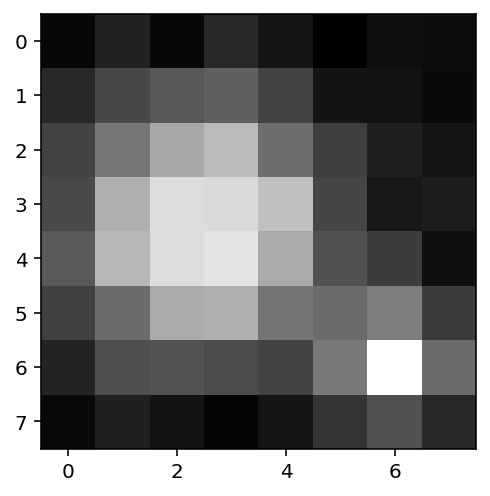

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the image module

x = mpimg.imread("bw.png") # read the image into an array
plt.figure(figsize=(4,4))
plt.imshow(x)


### Reduce to greyscale

In [11]:
print("Dimensions:", x.shape)

Dimensions: (8, 8, 4)


We will reduce the array to 2-dimensions by summing the last dimension:

In [12]:
z = np.sum(x, 2) # sum the RGBA values for each pixel
print(np.round(z, 1))

[[1.1 1.4 1.1 1.5 1.3 1.  1.2 1.1]
 [1.5 1.8 2.  2.1 1.8 1.2 1.2 1.1]
 [1.8 2.4 3.  3.2 2.3 1.7 1.4 1.2]
 [1.9 3.1 3.6 3.6 3.3 1.8 1.3 1.3]
 [2.  3.2 3.6 3.7 3.  2.  1.7 1.2]
 [1.8 2.3 3.  3.1 2.4 2.3 2.5 1.7]
 [1.4 1.9 2.  1.9 1.8 2.4 4.  2.3]
 [1.1 1.4 1.2 1.1 1.2 1.6 1.9 1.5]]


### Tresholding
The next step is to classify each pixel as 'foreground' (belonging to a particle) or 'background'. We do this by setting each pixel to 1 if it is above a threshold value, and 0 otherwise. But what threshold value should we choose? It certainly must lie between the minimum and maximum values of the array.

In [13]:
print("Min:", np.min(z))
print("Max:", np.max(z))

Min: 1.0
Max: 4.0


The threshold must lie between 1 and 4. Let's try a value of 2.

[[False False False False False False False False]
 [False False  True  True False False False False]
 [False  True  True  True  True False False False]
 [False  True  True  True  True False False False]
 [ True  True  True  True  True False False False]
 [False  True  True  True  True  True  True False]
 [False False False False False  True  True  True]
 [False False False False False False False False]]


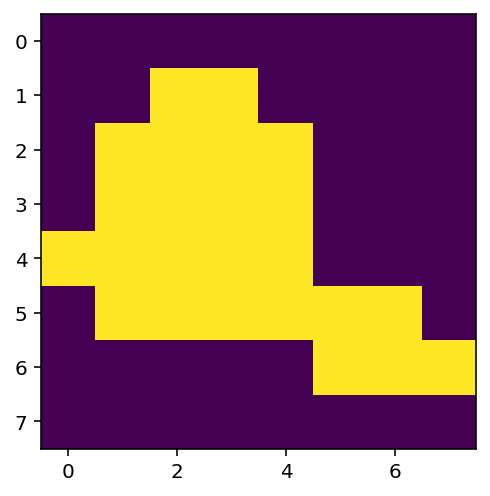

In [14]:
thres = 2
x_thres = z > thres # Determine pixels which are above the threshold
print(x_thres)
plt.figure(figsize=(4,4))
plt.imshow(x_thres) # Note that in Python True = 1 and False = 0

We would like to identify the largest blob (the top left one). We will increase the value of `thres` so that there are two distinct blobs in the thresholded image. 

[[False False False False False False False False]
 [False False False False False False False False]
 [False False  True  True False False False False]
 [False  True  True  True  True False False False]
 [False  True  True  True  True False False False]
 [False False  True  True False False False False]
 [False False False False False False  True False]
 [False False False False False False False False]]


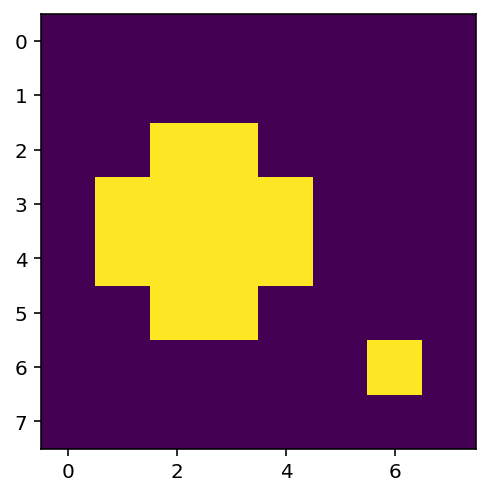

In [15]:
thres = 2.5
x_thres = z > thres # Determine pixels which are above the threshold
print(x_thres)
plt.figure(figsize=(4,4))
plt.imshow(x_thres) # Note that in Python True = 1 and False = 0

### Blob Location
The next step is the determine the location of the largest identified blob. Fortunately there are functions available in the `scipy.ndimage` package which do just that. First, use the function `label` to generate an array in which  each element is a number identifying which connected blob the pixel belongs to. In this case, there are two blobs, so every pixel is labelled 1 or 2 if it belongs to one of the blobs, or 0 if it belongs to neither.

In [16]:
import scipy.ndimage as sn # import the scipy.ndimage package
x_labels, n = sn.label(x_thres) # generate 
print("number of blobs:", n)
print(x_labels)

number of blobs: 2
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0]]


Next, use the `sn.sum` function to generate an array containing the size (in number of pixels) of each blob.

In [17]:
sizes = sn.sum(x_thres, x_labels, range(1, n+1))
print("sizes:", sizes)

sizes: [12.  1.]


So blob 1 has 9 pixels and blob 2 has 1 pixel.
`np.argmax` returns the index of the largest blob:

In [18]:
idx = np.argmax(sizes) # get the index of the largest blob
print("index:", idx)

index: 0


Note that the indexes of the `sizes` array are counted from 0 to n-1, whereas the labels are counted from 1 to n, so index `idx` corresponds to the blob with label `idx + 1`.  
Next we determine the location of the largest blob using the `sn.center_of_mass` function, which returns the co-ordinates of the centre of a blob. 

In [19]:
location = sn.center_of_mass(x_thres, x_labels, idx + 1) # determine the coordinates of the largest blob
print("location:", location)

location: (3.5, 2.5)


```{note}  
The `location` variable is a `tuple`. A tuple is the same as a list, and we use the same square bracket notation to access elements, such as `location[0]`. But:
- When defining a tuple we use round brackets `()` instead of square brackets `[]`. `location = (1, 4)`.
- A tuple is **immutable**, meaning its elements cannot be changed. `location[0] = 5` results in an error.
```

Finally we will mark the location of the centre of the largest blob using `plt.scatter`. Arrays indices are ordered *row* then *column* which is opposite to x-y ordering for the scatter plot, so we have to reverse the ordering of the `location` elements when plotting. 

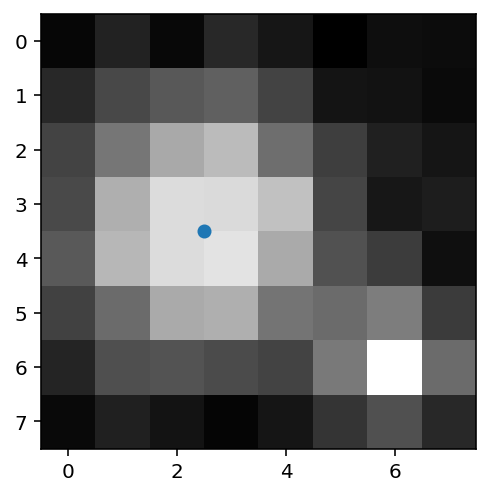

In [20]:
plt.figure(figsize=(4,4))
plt.imshow(x)
# arrays are indexed [column, row] whereas scatter plots are ordered [x, y]
# so we need to reverse the order of the indices
plt.scatter(location[1], location[0])

In this week's exercises you will repeat this procedure using a sequence of real experimental images of particles exhibiting Brownian motion.